<a href="https://colab.research.google.com/github/LiliValGo/Estaciones_Hidrologicas__Colombia/blob/main/estaciones_hidrologicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estaciones Hidrológicas de Colombia**

## **¿Qué hay en los datos?**

En el Dataset encontrarás información sobre la categorización y estado de las estaciones hidrológicas ubicadas en el territorio nacional(Fuentes hidrícas monitoreadas). Tambien información de geolocalización (Departamento, Municipio y Coordenadas).Los datos fueron extraidos de [datos.gov.co](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/estaciones-hidrologicas/bzh5-mste
)

## **¿Qué quiero saber?**

1.   ¿Cuál es la cantidad de estaciones Activas, Suspendidas o En Mantenimiento? 

2.   ¿Cuál es el tipo de estación de mayor presencia en el territorio nacional?

3. ¿Cuáles son los 5 principales departamentos con mayor número de estaciones? 

4. ¿Cuál es la fuente hídrica mayormente monitoreada?


## **¿Qué debes saber?**

**1. Tipos de Estaciones Hidrológicas**

Conceptos extraidos de: 
[DEFINICIONES DEL CATÁLOGO NACIONAL DE ESTACIONES
 ](http://www.ideam.gov.co/documents/10182/557765/Definiciones+CNE.pdf/25e1cca5-ee47-4eaf-86c0-c4f5192a9937)


> **Pluviométrica:** Es una estación meteorológica dotada de un pluviómetro o recipiente que permite medir la cantidad de lluvia caída entre dos observaciones consecutivas



> **Limnimétrica:** Estación donde se mide el nivel de una corriente hídrica mediante un aparato (mira dividida en centímetros) que mide altura del agua, sin registrarla. Una persona toma el dato y lo registra en una libreta.



> **Climatológica Ordinaria:** Es aquella en la cual se hacen observaciones de precipitación, temperatura del aire, temperaturas máxima y mínima a 2 metros y humedad primordialmente. Poseen muy poco instrumental registrador. Algunas llevan instrumentos adicionales tales como tanque de evaporación, heliógrafo y anemómetro.

> **Limnigráfica:** Estación donde se mide el nivel de una corriente hídrica mediante un aparato registrador de nivel y que grafica una curva llamada limnigrama


> **Pluviográfica:** Registra en forma mecánica y continua la precipitación, en una gráfica que permite conocer la cantidad, duración, intensidad y periodo en que ha ocurrido la lluvia. Actualmente se utilizan los pluviógrafos de registro diario

> **Climatológica Principal:** Es aquella en la cual se hacen observaciones de visibilidad, tiempo atmosférico presente, cantidad, tipo y altura de las nubes, estado del suelo, precipitación, temperatura del aire, humedad, viento, radiación, solar, brillo solar, evaporación y fenómenos especiales

> **Meteorológica especial:** Estación instalada para realizar seguimiento a un fenómeno o un fin específico, por ejemplo, las heladas

> **Mareográfica:** Estaciones para observación del estado del mar. Mide nivel, temperatura y salinidad de las aguas marinas

> **Agrometeorológica:** Determina las relaciones entre el tiempo y el clima, por una parte y la vida de las plantas y los animales, por la otra

> **Sinóptica Secundaria:** Al igual que en la estación anterior, las observaciones se realizan a horas convenidas internacionalmente y los datos corresponden comúnmente a visibilidad, fenómenos especiales, tiempo atmosférico, nubosidad, estado del suelo, precipitación, temperatura del aire, humedad del aire y viento

> **Sinóptica Principal:** Se efectúan observaciones de los principales elementos meteorológicos en horas convenidas internacionalmente. Los datos se toman horariamente y corresponden a nubosidad, dirección y velocidad de los vientos, presión atmosférica, temperatura del aire, tipo y altura de las nubes, visibilidad, fenómenos especiales, características de humedad, precipitación, temperaturas extremas, capas significativas de nubes, recorrido del viento y secuencia de los fenómenos atmosféricos

> **Radiosonda:** Tiene por finalidad la observación de temperaturas, presión, humedad y viento en las capas altas de la atmósfera (tropósfera y baja estratósfera), mediante el rastreo, por medios electrónicos o de radar, de la trayectoria de un globo meteorológico que asciende libremente



# **Importación de Librerias**

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno


#**Carga del Archivo CSV**

In [3]:

centro_monitoreo_hidrico = pd.read_csv('https://raw.githubusercontent.com/LiliValGo/Estaciones_Hidrologicas__Colombia/main/estaciones_hidrologicas_col/estaciones_hidrologicas.csv')
centro_monitoreo_hidrico

,Codigo,Nombre,Categoria,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Corriente
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)","2,582",2016-11-15,NaN,Guaitara
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)","2,450",2005-12-10,NaN,Guaitara
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)","3,120",2004-03-01,NaN,Guaitara
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,NaN,Guaitara
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,NaN,Amazonas
...,...,...,...,...,...,...,...,...,...,...,...
8968,4401700167,NIVEL SANGOYACO GARGANTA,Limnimétrica,Activa,Putumayo,Mocoa,"(1.15872222, -76.67080556)",761,2020-02-25,NaN,Mocoa
8969,4401700168,NIVEL MULATO PALMERAS,Limnimétrica,Activa,Putumayo,Mocoa,"(1.15638889, -76.69027778)",966,2020-02-25,NaN,Mocoa
8970,4401700172,NIVEL MOCOA PISCIKART,Limnimétrica,Activa,Putumayo,Villagarzón,"(1.03964167, -76.61091944)",408,2020-02-25,NaN,Mocoa
8971,4401700173,NIVEL RUMIYACO LAGARTO,Limnimétrica,Activa,Putumayo,Mocoa,"(1.119225, -76.67045)",647,2020-02-25,NaN,Mocoa


In [4]:
centro_monitoreo_hidrico['Nombre'].sample(30)

3898                 CAMPAMENTO [26197010]
6241           PARQUE NACIONAL  [21206720]
1165             PUERTO INIRIDA [31097020]
3433            MORALES-LA CRUZ [23205040]
8051               APIA  - AUT  [26145501]
7359     CORPOGUAJIRA RIOHACHA  [15061001]
3545                ARRASTRE EL [29037780]
743           SANTA ROSA  - AUT [23127060]
262        AEROPUERTO A BONILLA [26075040]
1655            PUENTE COLONIAL [24037300]
3414                VILLA LEIVA [23187100]
6550                   PALERMO  [26170140]
8723          BURITICA - AUT  [2621000029]
6967               ORIENTAL LA  [26170340]
6454               PTE PINILLA  [24017450]
4730                  SAN JOSE  [35030210]
6604                VENTALARGA  [21200260]
3052         INGENIO SANTA CRUZ [29035090]
4587    SAN_ANDRES_CIOH  - AUT  [12011001]
1961         NUEVO LIBARE BOCAT [26127160]
7702                 ELVIRA LA  [26050280]
7962           MOLINO EL PSN-1  [23087410]
8289             MOSCA LA RN-2  [23087030]
4169       

# **Exploración del DataFrame**

In [5]:
centro_monitoreo_hidrico['Departamento'].duplicated().value_counts()

True     8940
False      33
Name: Departamento, dtype: int64

In [6]:
centro_monitoreo_hidrico['Codigo'].duplicated().value_counts()

False    8973
Name: Codigo, dtype: int64

In [7]:
# Tipo de estaciones Hidrológicas
centro_monitoreo_hidrico['Categoria'].unique()

array(['Limnigráfica', 'Climática Principal', 'Mareográfica',
       'Pluviográfica', 'Climática Ordinaria', 'Agrometeorológica',
       'Limnimétrica', 'Pluviométrica', 'Meteorológica Especial',
       'Sinóptica Principal', 'Sinóptica Secundaria', 'Radio Sonda'],
      dtype=object)

In [8]:
# Valores únicos da la variable corriente
centro_monitoreo_hidrico['Corriente'].unique()

array(['Guaitara', 'Amazonas', '0', ..., '1229', '1233', '1241'],
      dtype=object)

In [9]:
# Filtrando por registro "numerico" de la variable corriente
centro_monitoreo_hidrico[centro_monitoreo_hidrico['Corriente'] == '1241'][['Corriente','Categoria',	'Estado',	'Departamento',	'Municipio']] 

,Corriente,Categoria,Estado,Departamento,Municipio
8911,1241,Limnigráfica,Activa,Caldas,Pácora
8912,1241,Limnigráfica,Activa,Caldas,Salamina (Caldas)


In [59]:
# Filtrando fuente hidrica del rio Atrató
centro_monitoreo_hidrico.query('Corriente == "Atrato"').sample(10)

,Codigo,Nombre,Categoria,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Corriente
2426,24030610,EMPODUITAMA [24030610],Pluviométrica,Suspendida,Boyacá,Duitama,"(5.85, -73.05)","2,590",1972-06-15,2002-02-15,Atrato
2406,26175040,TUNEZ HACIENDA [26175040],Climática Ordinaria,Activa,Antioquia,Fredonia,"(5.80025, -75.65097222)",604,1975-04-15,NaN,Atrato
3947,26220060,TUNAL EL [26220060],Pluviométrica,Suspendida,Antioquia,Santa Fe De Antioquia,"(6.58333333, -75.83333333)",650,1985-12-15,1989-05-15,Atrato
145,35235040,TRINIDAD - AUT [35235040],Climática Ordinaria,Activa,Casanare,Trinidad,"(5.41902778, -71.66616667)",265,2016-12-15,NaN,Atrato
149,55015010,PIE DE PATO - AUT [55015010],Climática Principal,Activa,Chocó,Alto Baudó (Pie De Pato),"(5.52108333, -76.97316667)",40,2006-03-12,NaN,Atrato
948,23100040,YOLOMBO [23100040],Pluviométrica,Activa,Antioquia,Yolombó,"(6.59427778, -75.01091667)",965,1975-04-15,NaN,Atrato
1723,11027060,PINON EL [11027060],Limnimétrica,Suspendida,Chocó,El Carmen (Choco),"(5.73333333, -76.36666667)","1,350",1959-03-15,1971-11-15,Atrato
152,11027070,BORAUDO - AUT [11027070],Limnigráfica,Activa,Chocó,Lloró,"(5.51461111, -76.57569444)",78,2005-04-14 19:00,NaN,Atrato
4060,27030130,LONDRE EL [27030130],Pluviométrica,Suspendida,Antioquia,El Bagre,"(7.46666667, -74.65)",10,1974-11-15,1987-05-15,Atrato
2408,26170190,DIQUE EL [26170190],Pluviométrica,Activa,Antioquia,Jericó (Antioquia),"(5.80386111, -75.72361111)","1,140",1970-09-15,NaN,Atrato


**NOTA:**

 La fuente hidrica del rio Atrató no recorre algunos departamentos como Santander, Boyaca, Caldas, Valle del Cauca, Arauca, Casanare. Los municipios de Antioquia que aqui se presentan no pertenecen a los municipios de Antioquia con influencia sobre el rio Atrato 

In [11]:
centro_monitoreo_hidrico['Departamento'].unique()

array(['Nariño', 'Putumayo', 'Amazonas', 'Caquetá', 'Huila', 'Cauca',
       'Bolívar', 'Sucre', 'Boyacá', 'Valle del Cauca', 'Caldas',
       'Tolima', 'Cundinamarca', 'Meta', 'Bogotá', 'Guainía', 'RIsaralda',
       'Quindío', 'Casanare', 'Chocó', 'Antioquia', 'Santander',
       'Norte de Santander', 'Arauca', 'Córdoba', 'Cesar', 'Magdalena',
       'La Guajira',
       'Archipiélago de San Andres, Providencia y Santa Catalina',
       'Atlantico', 'Vaupes', 'Vichada', 'Guaviare'], dtype=object)

In [12]:
centro_monitoreo_hidrico['Municipio'].unique()

array(['Ipiales', 'Contadero', 'Túquerres', ..., 'Soatá', 'Chitaraque',
       'Chipatá'], dtype=object)

In [13]:
centro_monitoreo_hidrico['Municipio'].duplicated().value_counts()

True     7946
False    1027
Name: Municipio, dtype: int64

In [14]:
centro_monitoreo_hidrico['Corriente'].duplicated().value_counts()

True     7821
False    1152
Name: Corriente, dtype: int64

In [15]:
# Cantidad de observaciones y variables
centro_monitoreo_hidrico.shape

(8973, 11)

In [16]:
# Tipo de datos 
centro_monitoreo_hidrico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Codigo             8973 non-null   int64 
 1   Nombre             8973 non-null   object
 2   Categoria          8973 non-null   object
 3   Estado             8973 non-null   object
 4   Departamento       8973 non-null   object
 5   Municipio          8973 non-null   object
 6   Ubicación          8973 non-null   object
 7   Altitud            8973 non-null   object
 8   Fecha_instalacion  8839 non-null   object
 9   Fecha_suspension   3441 non-null   object
 10  Corriente          8955 non-null   object
dtypes: int64(1), object(10)
memory usage: 771.2+ KB


In [17]:
print(centro_monitoreo_hidrico.isna().any())

Codigo               False
Nombre               False
Categoria            False
Estado               False
Departamento         False
Municipio            False
Ubicación            False
Altitud              False
Fecha_instalacion     True
Fecha_suspension      True
Corriente             True
dtype: bool


In [18]:
# Cantidad de observaciones faltantes 
centro_monitoreo_hidrico.isna().sum()

Codigo                  0
Nombre                  0
Categoria               0
Estado                  0
Departamento            0
Municipio               0
Ubicación               0
Altitud                 0
Fecha_instalacion     134
Fecha_suspension     5532
Corriente              18
dtype: int64

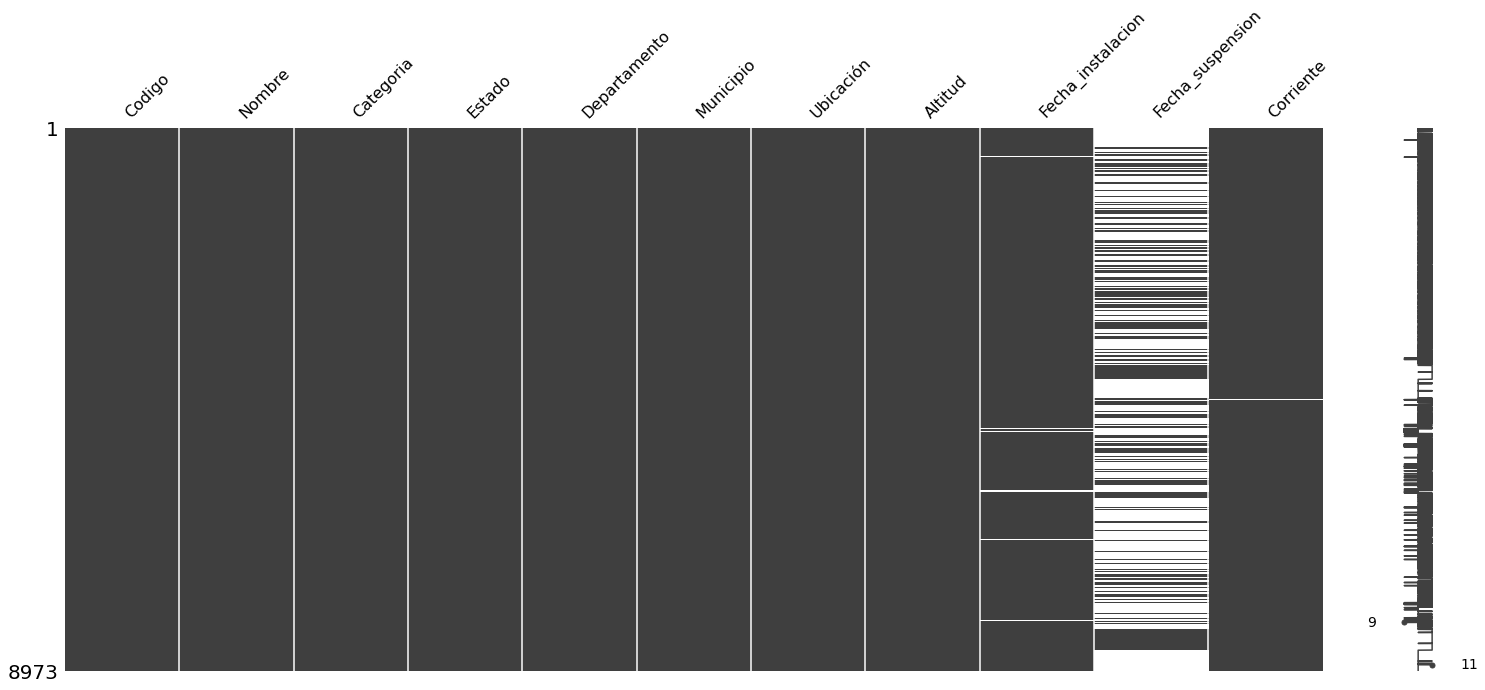

In [19]:
msno.matrix(centro_monitoreo_hidrico)

In [20]:
centro_monitoreo_hidrico.describe(include=['O'])

,Nombre,Categoria,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Corriente
count,8973,8973,8973,8973,8973,8973,8973,8839,3441,8955
unique,8945,12,3,33,1027,7897,1974,1725,910,1151
top,TURMEQUE JOYAGUA [35075120],Pluviométrica,Activa,Antioquia,"Bogota, D.C","(4.6, -74.08333333)",20,2017-06-30 19:00,2002-02-15,0
freq,3,3533,5491,1215,342,8,135,75,93,878


#**Identifique el número total de estaciones de acuerdo a su estado. Para ello use 4 metodologías diferentes**

## **Opcion 1. Filtrando y contando los criterios de la Columna 'Estado'**

In [21]:
centro_monitoreo_hidrico[centro_monitoreo_hidrico['Estado']== 'Activa'].count()

Codigo               5491
Nombre               5491
Categoria            5491
Estado               5491
Departamento         5491
Municipio            5491
Ubicación            5491
Altitud              5491
Fecha_instalacion    5357
Fecha_suspension        2
Corriente            5487
dtype: int64

In [22]:
centro_monitoreo_hidrico[centro_monitoreo_hidrico['Estado']== 'Suspendida'].count()

Codigo               3439
Nombre               3439
Categoria            3439
Estado               3439
Departamento         3439
Municipio            3439
Ubicación            3439
Altitud              3439
Fecha_instalacion    3439
Fecha_suspension     3439
Corriente            3425
dtype: int64

In [23]:
centro_monitoreo_hidrico[centro_monitoreo_hidrico['Estado']== 'En Mantenimiento'].count()

Codigo               43
Nombre               43
Categoria            43
Estado               43
Departamento         43
Municipio            43
Ubicación            43
Altitud              43
Fecha_instalacion    43
Fecha_suspension      0
Corriente            43
dtype: int64

## **Opcion 2. Filtrando usando metodo .query()**

In [24]:
metodo_query =centro_monitoreo_hidrico.query('Estado == "Activa"')
len(metodo_query)


5491

In [25]:
metodo_query = centro_monitoreo_hidrico.query('Estado == "Suspendida"')
len(metodo_query)

3439

In [26]:
metodo_query = centro_monitoreo_hidrico.query('Estado == "En Mantenimiento"')
len(metodo_query)

43

In [27]:
centro_monitoreo_hidrico[centro_monitoreo_hidrico['Corriente'] == "Atrato"][['Corriente','Departamento', 'Municipio', 'Categoria', 'Estado']].sample(10)

,Corriente,Departamento,Municipio,Categoria,Estado
2996,Atrato,Antioquia,Turbo,Pluviográfica,Activa
2997,Atrato,Chocó,Riosucio (Choco),Limnimétrica,Suspendida
951,Atrato,Antioquia,Puerto Berrío,Pluviométrica,Activa
950,Atrato,Antioquia,Santa Rosa De Osos,Pluviométrica,Activa
1018,Atrato,Chocó,El Carmen (Choco),Limnigráfica,Activa
2407,Atrato,Boyacá,Duitama,Agrometeorológica,Activa
4349,Atrato,Chocó,Quibdó,Limnigráfica,Activa
4352,Atrato,Chocó,Carmen Del Darién (Curbaradó),Limnimétrica,Activa
956,Atrato,Antioquia,Puerto Berrío,Pluviográfica,Suspendida
149,Atrato,Chocó,Alto Baudó (Pie De Pato),Climática Principal,Activa


## **Opcion 3. Usando ciclo for**

In [28]:
for estado in centro_monitoreo_hidrico:
  estado_activa = centro_monitoreo_hidrico[centro_monitoreo_hidrico['Estado'] == 'Activa']
len(estado_activa)

5491

In [29]:
for estado in centro_monitoreo_hidrico:
  estado_suspendida = centro_monitoreo_hidrico[centro_monitoreo_hidrico['Estado'] == 'Suspendida']
len(estado_suspendida)

3439

In [30]:
for estado in centro_monitoreo_hidrico:
  estado_mantenimiento = centro_monitoreo_hidrico[centro_monitoreo_hidrico['Estado'] == 'En Mantenimiento']
len(estado_mantenimiento)

43

## **Opcion 4. Usando value_counts()**

In [31]:
# Cantidad de estaciones de acuerdo a su estado 
centro_monitoreo_hidrico.Estado.value_counts()

Activa              5491
Suspendida          3439
En Mantenimiento      43
Name: Estado, dtype: int64

# **Hora de Graficar**

### **Diagrama de torta para representar el Porcentaje del estado de las estaciones** 

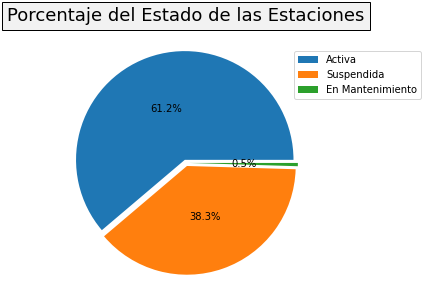

In [32]:
estado = centro_monitoreo_hidrico.Estado.value_counts()

pie, ax = plt.subplots(figsize=[8,5])
labels = estado.keys()
plt.pie(x=estado, autopct="%.1f%%", explode=[0.03]*3, labels=labels, pctdistance=0.5, labeldistance=None)
plt.title("Porcentaje del Estado de las Estaciones", fontsize=18, bbox={"facecolor":"0.95", "pad":5})
plt.legend(bbox_to_anchor=(0.88, 0.93))

## **value_counts() para cuantificar las estaciones de acuerdo a su categoria**

In [33]:
centro_monitoreo_hidrico.Categoria.value_counts()

Pluviométrica             3533
Limnimétrica              1747
Limnigráfica              1140
Climática Ordinaria        887
Climática Principal        680
Pluviográfica              631
Meteorológica Especial     166
Agrometeorológica           74
Mareográfica                49
Sinóptica Principal         37
Sinóptica Secundaria        15
Radio Sonda                 14
Name: Categoria, dtype: int64

### **Grafica de torta para representar el porcentaje de las estaciones de acuerdo a su categoria**

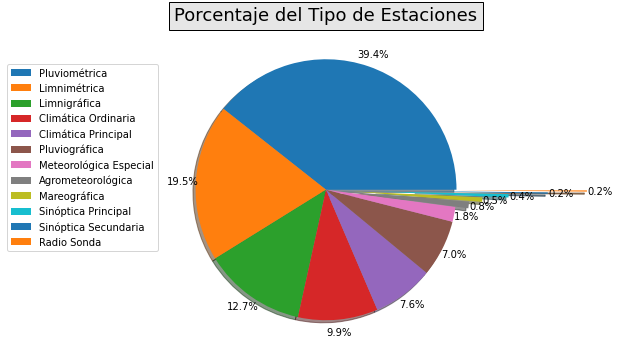

In [34]:
categoria = centro_monitoreo_hidrico.Categoria.value_counts()
explode = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.4, 0.7, 1]
pie, ax = plt.subplots(figsize=[10,6])
labels = categoria.keys()
plt.pie(x=categoria, autopct="%.1f%%", explode=explode,  labels=labels, pctdistance=1.1, shadow=True, labeldistance=None)
plt.title("Porcentaje del Tipo de Estaciones", fontsize=18, bbox={"facecolor":"0.9", "pad":5})
plt.legend(bbox_to_anchor=(0, 0.9))
#plt.legend(loc = 'upper left')

### **Grafica de barra 1 para representar la cantidad de estaciones de acuerdo a su categoria**

Text(0, 0.5, 'Cantidad')

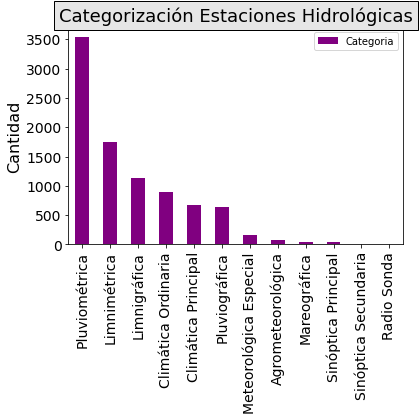

In [35]:
categorizacion = centro_monitoreo_hidrico.Categoria.value_counts()
df_categorizacion = pd.DataFrame(categorizacion)
labels = categorizacion.keys
df_categorizacion.plot(kind = 'bar', fontsize=14, color='purple')
plt.title('Categorización Estaciones Hidrológicas', fontsize=18, bbox={"facecolor":"0.9", "pad":5})
plt.ylabel('Cantidad', fontsize=16)

### **Grafica de barra 2 para representar la cantidad de estaciones de acuerdo a su categoria**

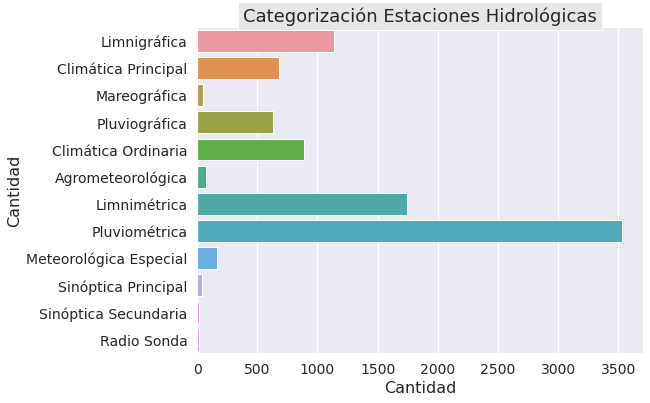

In [36]:
sns.set_theme(context='notebook', style='darkgrid', palette='bright', font='sans-serif')
plt.figure(figsize=(8,6))
sns.countplot(y='Categoria', data=centro_monitoreo_hidrico)
plt.title('Categorización Estaciones Hidrológicas', fontsize=18, bbox={"facecolor":"0.9", "pad":5})
plt.xlabel('Cantidad', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## **De acuerdo a la categorización. ¿En que estado se encuentra cada una?**

In [37]:
centro_monitoreo_hidrico.groupby('Categoria')['Estado'].value_counts()

Categoria               Estado          
Agrometeorológica       Activa                57
                        Suspendida            16
                        En Mantenimiento       1
Climática Ordinaria     Suspendida           478
                        Activa               401
                        En Mantenimiento       8
Climática Principal     Activa               576
                        Suspendida           103
                        En Mantenimiento       1
Limnigráfica            Activa               853
                        Suspendida           269
                        En Mantenimiento      18
Limnimétrica            Activa               898
                        Suspendida           846
                        En Mantenimiento       3
Mareográfica            Activa                31
                        Suspendida            17
                        En Mantenimiento       1
Meteorológica Especial  Activa                94
                        Susp

### **Grafica de barra para representar el estado en que se encuentra cada una de las estaciones**

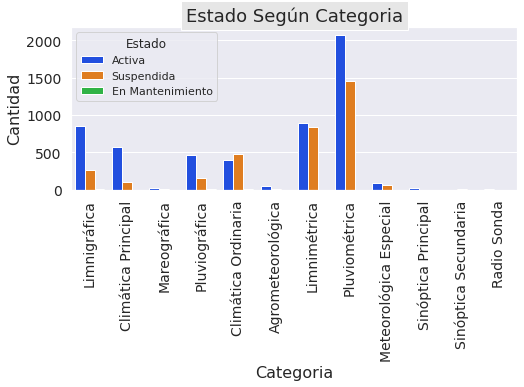

In [38]:
sns.set_theme(context='notebook', style='darkgrid', palette='bright', font='sans-serif')
plt.figure(figsize=(8,3))
sns.countplot(x='Categoria', data=centro_monitoreo_hidrico, hue='Estado')
plt.title('Estado Según Categoria', fontsize=18, bbox={"facecolor":"0.9", "pad":5})
plt.ylabel('Cantidad', fontsize=16)
plt.xlabel('Categoria', fontsize=16)
plt.xticks(rotation = 90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Colombia tiene instalados en su territorio Nacional principalmente estaciones de tipo Pluviométrica. Por otro lado, las estaciones de tipo Climática Ordinaria presenta un mayor número de estaciones suspendidas que Activas 

## **Determine el valorcorrespondiente de los primeros 5 Departamento con mayor numero de estaciones segun su Estado**

### **Grafica de barra para representar los departamentos con mayor número de estaciones de acuerdo a su estado**

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text major ticklabel objects>)

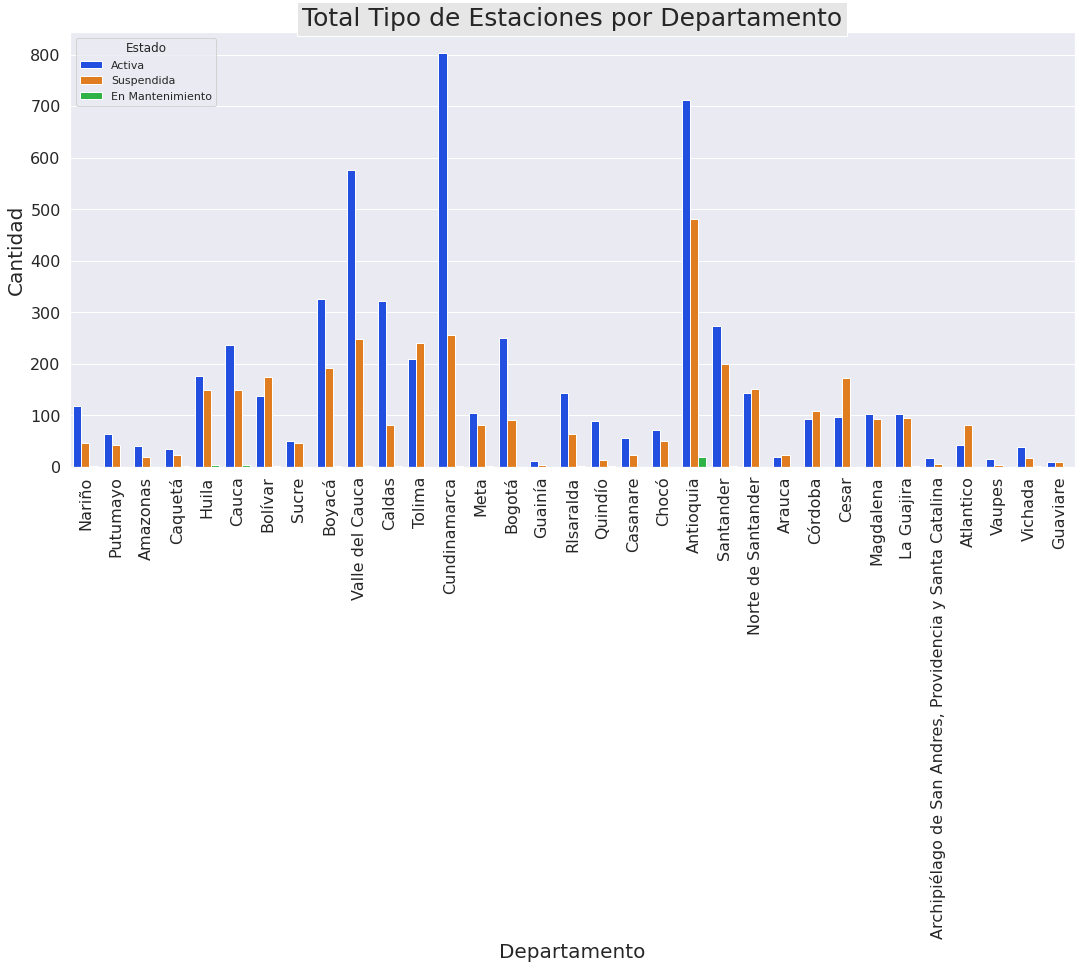

In [39]:
sns.set_theme(context='notebook', style='darkgrid', palette='bright', font='sans-serif')
plt.figure(figsize=(18,8))
sns.countplot(x='Departamento',  data=centro_monitoreo_hidrico, hue='Estado')
plt.title('Total Tipo de Estaciones por Departamento', fontsize=25, bbox={"facecolor":"0.9", "pad":5})
plt.ylabel('Cantidad', fontsize=20)
plt.xlabel('Departamento', fontsize=20)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

Departamentos como NS, Cesar Bolivar, Tolima Córdoba, Atlantico y Arauca reportan un número de estaciones suspendidas mayor al numero de estaciones Activas

In [40]:
top_5_departamentos = centro_monitoreo_hidrico.groupby(['Departamento', 'Estado']).agg({'Estado':'count'})
top_5_departamentos.query('Departamento == "Cundinamarca"')

Estado
Departamento Estado                  
Cundinamarca Activa               804
             En Mantenimiento       2
             Suspendida           256

In [41]:
top_5_departamentos = centro_monitoreo_hidrico.groupby(['Departamento', 'Estado']).agg({'Estado':'count'})
top_5_departamentos.query('Departamento == "Antioquia"')

Estado
Departamento Estado                  
Antioquia    Activa               713
             En Mantenimiento      20
             Suspendida           482

In [42]:
top_5_departamentos = centro_monitoreo_hidrico.groupby(['Departamento', 'Estado']).agg({'Estado':'count'})
top_5_departamentos.query('Departamento == "Valle del Cauca"')


Estado
Departamento    Estado                  
Valle del Cauca Activa               577
                En Mantenimiento       2
                Suspendida           248

In [43]:
top_5_departamentos = centro_monitoreo_hidrico.groupby(['Departamento', 'Estado']).agg({'Estado':'count'})
top_5_departamentos.query('Departamento == "Boyacá"')


Estado
Departamento Estado                  
Boyacá       Activa               326
             En Mantenimiento       1
             Suspendida           193

In [44]:
top_5_departamentos = centro_monitoreo_hidrico.groupby(['Departamento', 'Estado']).agg({'Estado':'count'})
top_5_departamentos.query('Departamento == "Caldas"')

Estado
Departamento Estado                  
Caldas       Activa               323
             En Mantenimiento       1
             Suspendida            81

In [45]:
top_5_departamentos = centro_monitoreo_hidrico.groupby(['Departamento', 'Estado']).agg({'Estado':'count'})
top_5_departamentos.query('Departamento == "Santander"')

Estado
Departamento Estado                  
Santander    Activa               273
             En Mantenimiento       1
             Suspendida           199

## **Identifique los departamento con mayor número de estaciones según su categoria**

In [46]:
centro_monitoreo_hidrico.groupby(['Categoria', 'Departamento']).agg({'Estado':'count'}).sort_values('Estado', ascending=False).head(20)


Estado
Categoria     Departamento              
Pluviométrica Valle del Cauca        419
              Antioquia              367
Limnimétrica  Cundinamarca           316
Pluviométrica Cundinamarca           292
Limnigráfica  Antioquia              258
Pluviográfica Antioquia              257
Pluviométrica Santander              223
              Tolima                 208
              Boyacá                 182
              Cauca                  175
Limnimétrica  Antioquia              166
Pluviométrica Caldas                 161
              Cesar                  160
              Huila                  153
Limnigráfica  Cundinamarca           141
Limnimétrica  Boyacá                 141
              Bolívar                131
Pluviométrica Norte de Santander     129
Limnimétrica  Santander              115
Pluviométrica Bogotá                 111

Aunque vemos que Antioquia tiene mayor número de estaciones Activas, Es el Valle del Cauca quien tiene mayor número de estaciones Pluviométricas instaladas

# **value_counts() para cuantificar las corrientes hidricas monitoreadas**

In [47]:
corriente_hidrica = centro_monitoreo_hidrico.groupby(['Departamento', 'Corriente', 'Categoria', 'Estado']).count()
df_corriente_hidrica = pd.DataFrame(corriente_hidrica)
df_corriente_hidrica

Codigo  ...  Fecha_suspension
Departamento Corriente          Categoria              Estado              ...                  
Amazonas     0                  Climática Ordinaria    Suspendida       1  ...                 1
                                Climática Principal    Activa           1  ...                 0
                                Meteorológica Especial Suspendida       1  ...                 1
                                Pluviométrica          Activa           1  ...                 0
                                Radio Sonda            Activa           2  ...                 0
...                                                                   ...  ...               ...
Vichada      Quebrada Guatoque  Pluviométrica          Suspendida       1  ...                 1
             Quebrada Idaza     Climática Ordinaria    Activa           1  ...                 0
             Quebrada Los Pozos Pluviométrica          Activa           1  ...                 0
             Tuparro            Limnimétrica           Activa           2  ...                 0
             Vichada            Limnimétrica           Activa           1  ...                 0

[5373 rows x 7 columns]

Vemos que me imprimio todas las columnas con un valor. Sin embargo, no requiero todos los valores del DataFrame. Por lo tanto, **renombro la columna 'Codigo' por 'Total'**

In [48]:
renombrar_columna_codigo = df_corriente_hidrica.rename(columns={'Codigo': 'Total'})
renombrar_columna_codigo

Total  ...  Fecha_suspension
Departamento Corriente          Categoria              Estado             ...                  
Amazonas     0                  Climática Ordinaria    Suspendida      1  ...                 1
                                Climática Principal    Activa          1  ...                 0
                                Meteorológica Especial Suspendida      1  ...                 1
                                Pluviométrica          Activa          1  ...                 0
                                Radio Sonda            Activa          2  ...                 0
...                                                                  ...  ...               ...
Vichada      Quebrada Guatoque  Pluviométrica          Suspendida      1  ...                 1
             Quebrada Idaza     Climática Ordinaria    Activa          1  ...                 0
             Quebrada Los Pozos Pluviométrica          Activa          1  ...                 0
             Tuparro            Limnimétrica           Activa          2  ...                 0
             Vichada            Limnimétrica           Activa          1  ...                 0

[5373 rows x 7 columns]

Ahora que la he renombrado, solo quiero visualizar los datos hasta la columna 'Total'

In [49]:
renombrar_columna_codigo.iloc[:, [0]]

Total
Departamento Corriente          Categoria              Estado           
Amazonas     0                  Climática Ordinaria    Suspendida      1
                                Climática Principal    Activa          1
                                Meteorológica Especial Suspendida      1
                                Pluviométrica          Activa          1
                                Radio Sonda            Activa          2
...                                                                  ...
Vichada      Quebrada Guatoque  Pluviométrica          Suspendida      1
             Quebrada Idaza     Climática Ordinaria    Activa          1
             Quebrada Los Pozos Pluviométrica          Activa          1
             Tuparro            Limnimétrica           Activa          2
             Vichada            Limnimétrica           Activa          1

[5373 rows x 1 columns]

In [50]:
renombrar_columna_codigo.query('Corriente == "Medellin"')

Total  ...  Fecha_suspension
Departamento Corriente Categoria           Estado             ...                  
Antioquia    Medellin  Limnigráfica        Activa          5  ...                 0
                                           Suspendida      6  ...                 6
                       Limnimétrica        Activa          1  ...                 0
                       Pluviográfica       Activa          6  ...                 0
                                           Suspendida      2  ...                 2
                       Pluviométrica       Activa          1  ...                 0
                                           Suspendida      1  ...                 1
Boyacá       Medellin  Pluviométrica       Activa          1  ...                 0
Santander    Medellin  Pluviométrica       Activa          1  ...                 0
Vichada      Medellin  Sinóptica Principal Suspendida      1  ...                 1

[10 rows x 7 columns]

El la corriente o rio Cali, pertenece netamente al Dpto del Valle del Cauca. Estos datos presentarón importantes errores. Este es uno de ellos. 

Pero, dado que la finalidad de este proyecto ha sido practicar y profundizar conceptos y temas vistos durante mi aprendizaje en DataCamp. No profundizaré o intentaré corregir dichos errores. 